In [0]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

Here i choos knn model because it is easy to interpret output and it's calculation time is low. for evalutaion of this model we just need to find the value of k. So in this practical first i choose random k value and find the accuracy of it , then i apply MSE to find the value of k for which the output accuracy is better. 

In [0]:
# load dataset
digits = load_digits()
X = digits.data
y = digits.target

In [0]:
# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [0]:
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)

In [8]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# get the predict value from X_test
y_pred = knn.predict(X_test)

In [10]:
# print the score
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9822222222222222


In [0]:
# import k-folder
from sklearn.model_selection import cross_val_score

In [0]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)

In [0]:
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [15]:
#print all scores
print(scores)

[0.9478022  0.9558011  0.96657382 0.98039216 0.96338028]


In [16]:
#average mean 
print(scores.mean())

0.9627899114966898


In [0]:
#we want to check for which value of k the accuracy is higher so we took a range of 1-31
k_range = range(1, 31)
k_scores = []


In [0]:
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

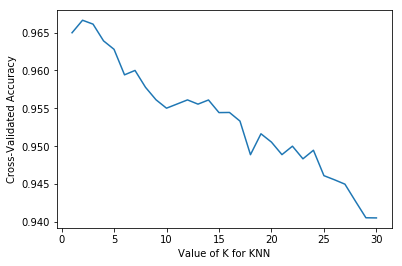

In [21]:
# plot to see clearly
#from below output we can see that value for k around 1-5 for better accuracy 
#after 5 the value is dicreasing so we will not use below 5

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [0]:
#now we want to improve the score 
#neg_mean_squared_error for scoring better accuracy
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())

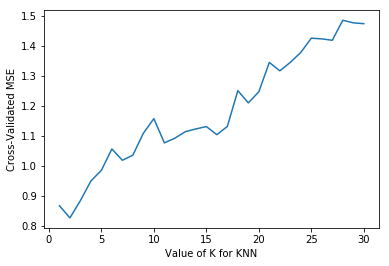

In [23]:
#here from below output we will choose the knn value of k which has minimum value of MSE
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [0]:
#so from above result we come to know that we should take k(1-5)
#here i take k=3
# here for k=1 it is always zero for the training sample,This is because the closest point to any training data point is itself
#Hence the prediction is always accurate with K=1
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [49]:
#print the accuracy for k=2
print('accuracy: ', knn.score(X_test, y_test))


accuracy:  0.9844444444444445
